Mean Squared Error: 87018372.39
R-squared Score: 0.9951


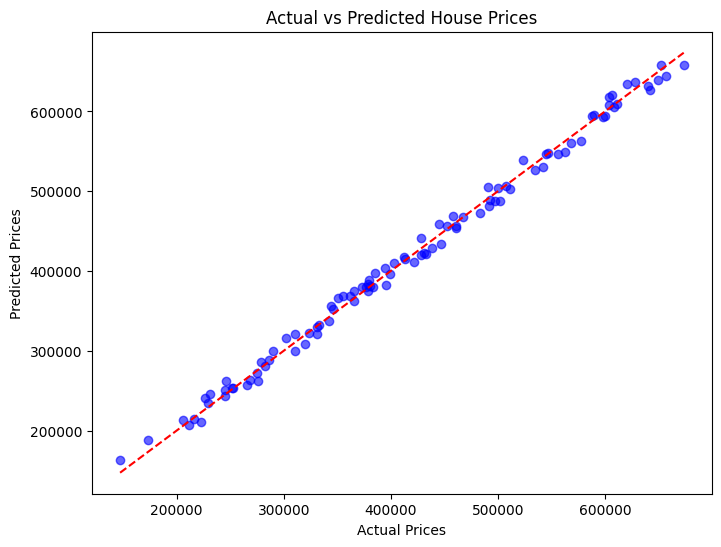


Feature Coefficients:
          Coefficient
Size       149.262582
Bedrooms  9863.959901
Age       -462.999167


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generate synthetic house price data
np.random.seed(42)
n_samples = 500
house_size = np.random.randint(800, 4000, n_samples)
bedrooms = np.random.randint(1, 6, n_samples)
house_age = np.random.randint(1, 50, n_samples)
price = house_size * 150 + bedrooms * 10000 - house_age * 500 + np.random.randint(20000, 50000, n_samples)

# Create a DataFrame
data = pd.DataFrame({'Size': house_size, 'Bedrooms': bedrooms, 'Age': house_age, 'Price': price})

# Split the data into training and testing sets
X = data[['Size', 'Bedrooms', 'Age']]
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared Score: {r2:.4f}')

# Plot actual vs predicted prices
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()

# Display feature coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print('\nFeature Coefficients:')
print(coefficients)
